# Analysing general behaviour via tracked `trx.mat` data
Sharbat (on 2025-04-23) has decided to split up the Jupyter Notebook dealing with both Chore and `trx.mat` file processing into two notebooks.

This notebook deals with just the information read from the `trx.mat` files.


In [22]:
import os
import sys
import src.trx_processor as trx_processor
import matplotlib.pyplot as plt 
plt.style.use('../anemotaxis.mplstyle')
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
base_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n"
trx_path = os.path.join(base_path, "20240308_124423/trx.mat")

In [24]:
# Process a single trx.mat file
date_str, extracted_data, metadata = trx_processor.process_single_file(trx_path)

print(f"\nProcessed file metadata:")
print(f"Date: {metadata['date']}")
print(f"Number of larvae: {metadata['n_larvae']}")

Processing larvae:   0%|          | 0/39 [00:00<?, ?it/s]


Processed file metadata:
Date: 2024-03-08 00:00:00
Number of larvae: 39


In [25]:
# Process all trx files in a directory tree
all_data = trx_processor.process_all_trx_files(base_path)

print(f"\nProcessed all files:")
print(f"Total experiments: {len(all_data['metadata']['experiments'])}")
print(f"Total larvae: {all_data['metadata']['total_larvae']}")  # Remove len() as total_larvae is already an integer

Found 8 trx.mat files


Processing trx files:   0%|          | 0/8 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/71 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/57 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/65 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/39 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/47 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/38 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/41 [00:00<?, ?it/s]

Processing larvae:   0%|          | 0/57 [00:00<?, ?it/s]


Processed 8 files
Total larvae: 415

Processed all files:
Total experiments: 8
Total larvae: 415


In [26]:
# Filter using percentile threshold (bottom 10% removed)
# filtered_data = trx_processor.filter_larvae_by_duration(extracted_data, percentile=10)

# Or specify minimum duration in seconds
filtered_extracted_data = trx_processor.filter_larvae_by_duration(extracted_data, min_total_duration=300)
filtered_all_data = trx_processor.filter_larvae_by_duration(all_data, min_total_duration=300)

# Print filtering results
n_original = len(extracted_data)
n_filtered = len(filtered_extracted_data)
print(f"Filtered out {n_original - n_filtered} larvae ({(n_original - n_filtered)/n_original*100:.1f}%)")

Filtered out 16 larvae (41.0%)


/Users/sharbat/Projects/anemotaxis/src/trx_processor.py:712: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Filter behaviors with data


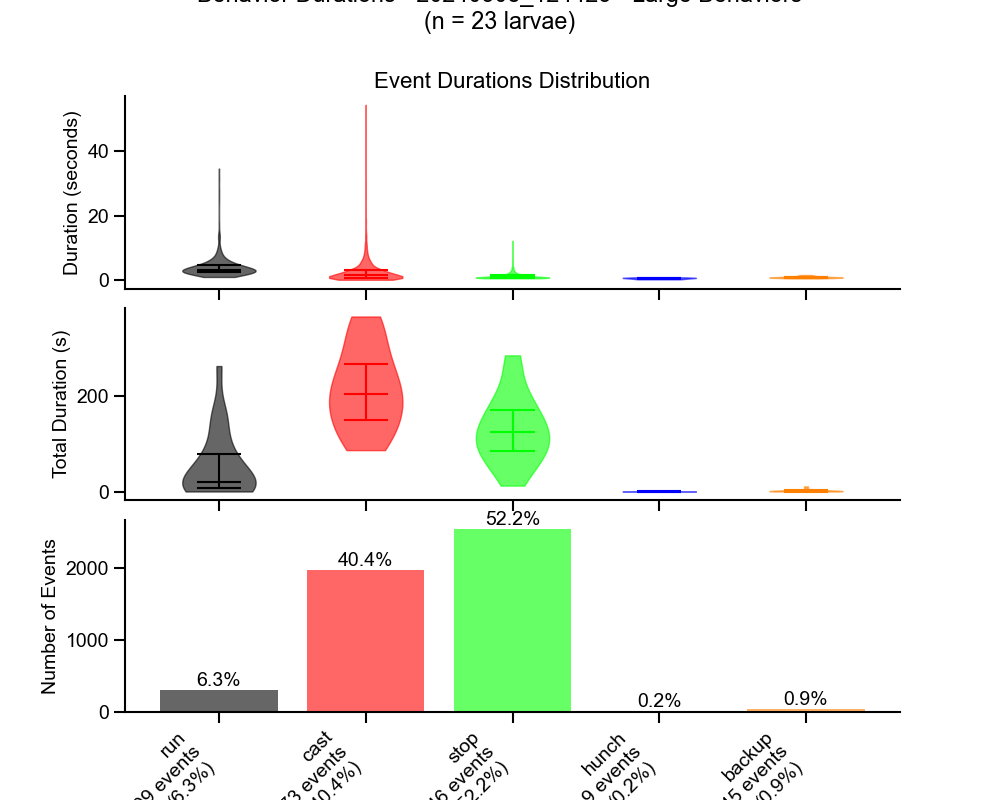

/Users/sharbat/Projects/anemotaxis/src/trx_processor.py:712: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Filter behaviors with data


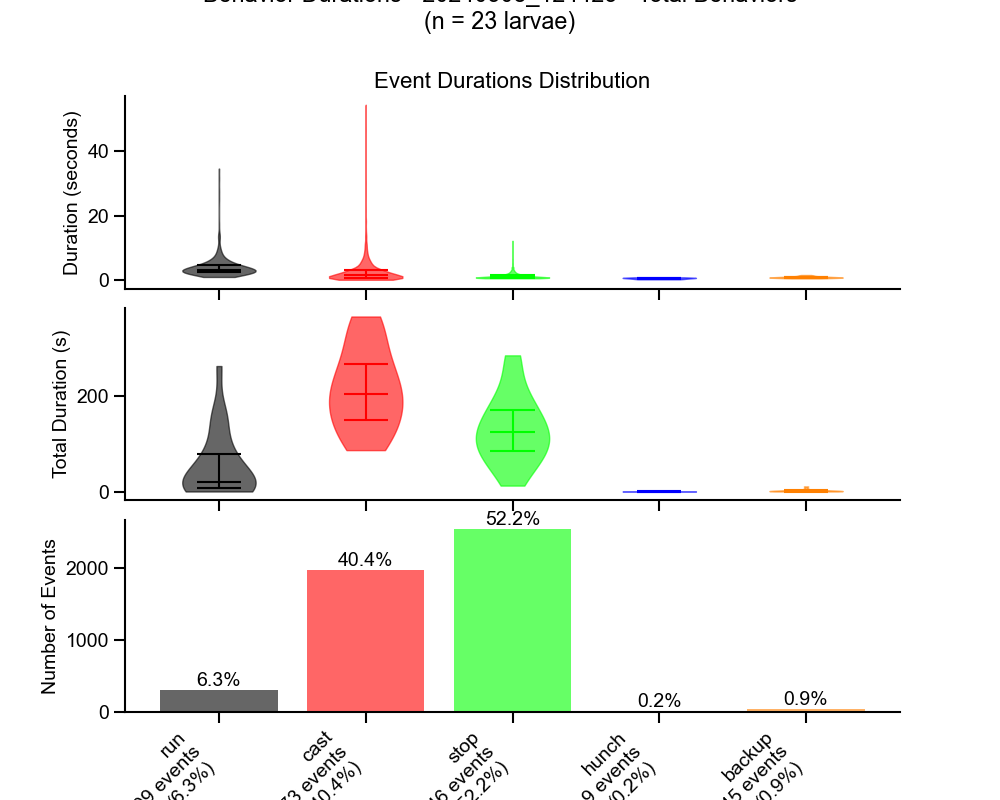


Large Behaviors analysis for Behavior Durations - 20240308_124423
Number of larvae: 23
Total actions: 4882

    Behavior   Events  %Total      Mean(s)  Median(s)
------------------------------------------------------------
         run:      309    6.3%      4.07       3.08
        cast:     1973   40.4%      2.49       1.51
        stop:     2546   52.2%      1.18       0.89
       hunch:        9    0.2%      0.48       0.50
      backup:       45    0.9%      0.83       0.76

Total Behaviors analysis for Behavior Durations - 20240308_124423
Number of larvae: 23
Total actions: 4882

    Behavior   Events  %Total      Mean(s)  Median(s)
------------------------------------------------------------
         run:      309    6.3%      4.07       3.08
        cast:     1973   40.4%      2.49       1.51
        stop:     2546   52.2%      1.18       0.89
       hunch:        9    0.2%      0.48       0.50
      backup:       45    0.9%      0.83       0.76


In [28]:
# For all experiments
stats = trx_processor.analyze_behavior_durations(filtered_extracted_data, title=f"Behavior Durations - {date_str}")

/Users/sharbat/Projects/anemotaxis/src/trx_processor.py:712: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Filter behaviors with data


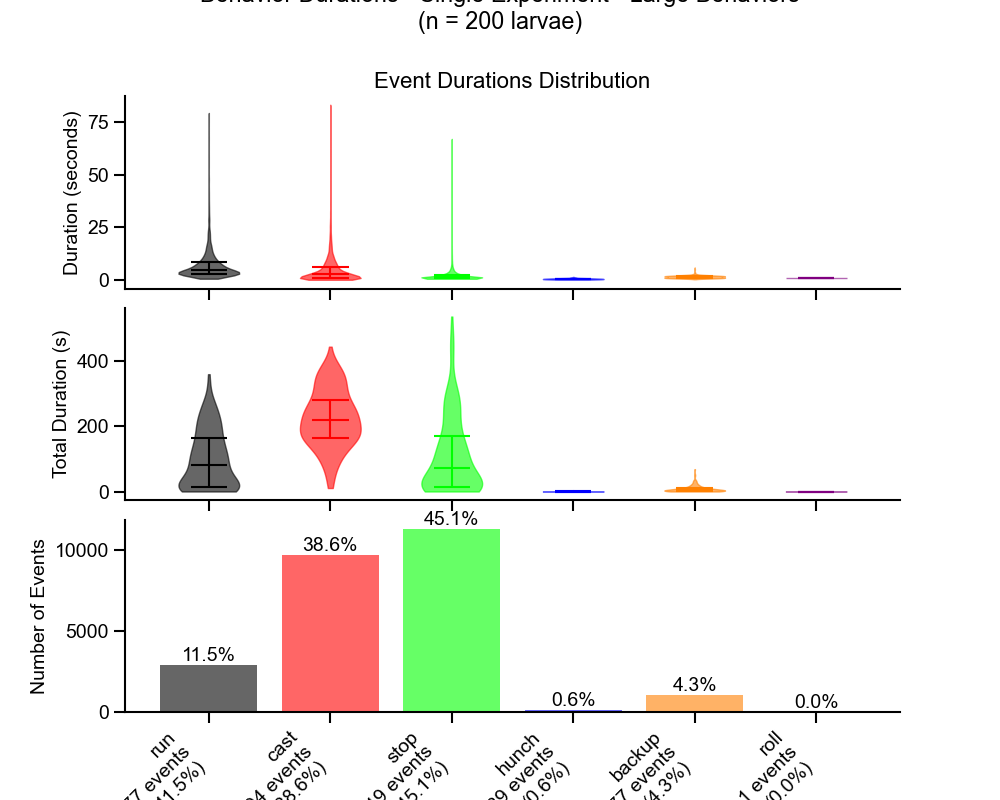

/Users/sharbat/Projects/anemotaxis/src/trx_processor.py:712: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Filter behaviors with data


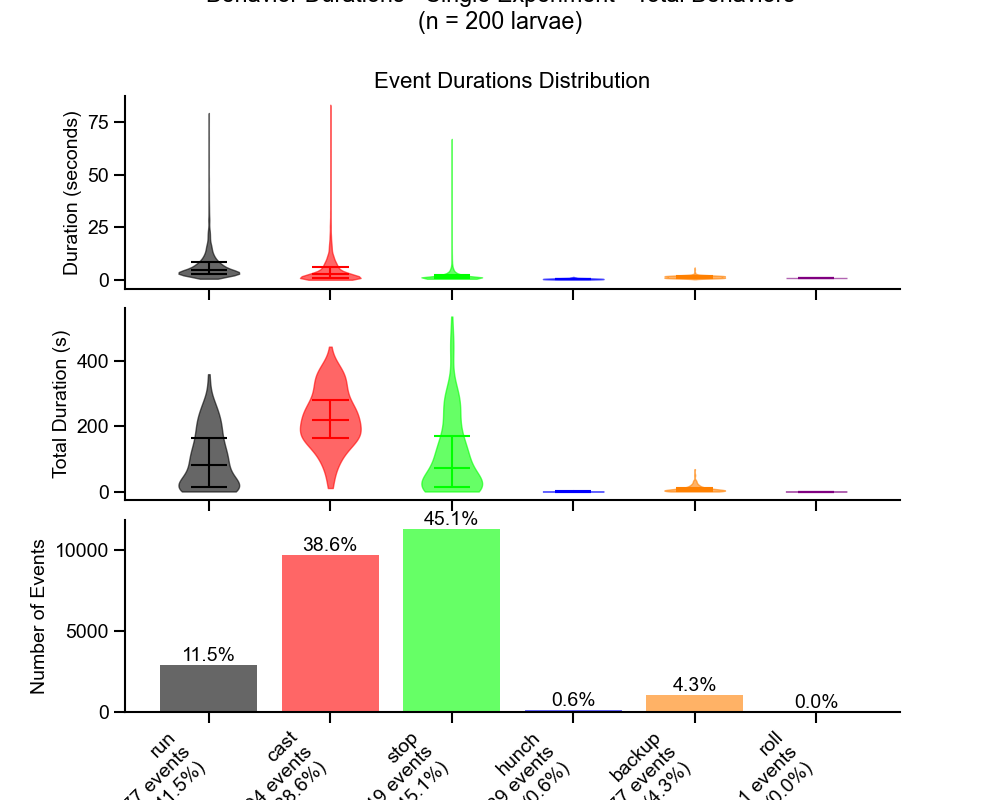


Large Behaviors analysis for Behavior Durations - Single Experiment
Number of larvae: 200
Total actions: 25107

    Behavior   Events  %Total      Mean(s)  Median(s)
------------------------------------------------------------
         run:     2877   11.5%      6.79       4.55
        cast:     9694   38.6%      4.62       2.58
        stop:    11319   45.1%      1.94       1.25
       hunch:      139    0.6%      0.45       0.42
      backup:     1077    4.3%      1.45       1.40
        roll:        1    0.0%      0.90       0.90

Total Behaviors analysis for Behavior Durations - Single Experiment
Number of larvae: 200
Total actions: 25107

    Behavior   Events  %Total      Mean(s)  Median(s)
------------------------------------------------------------
         run:     2877   11.5%      6.79       4.55
        cast:     9694   38.6%      4.62       2.58
        stop:    11319   45.1%      1.94       1.25
       hunch:      139    0.6%      0.45       0.42
      backup:     1077  

In [29]:
# For all experiments
stats = trx_processor.analyze_behavior_durations(filtered_all_data, title="Behavior Durations - Single Experiment")

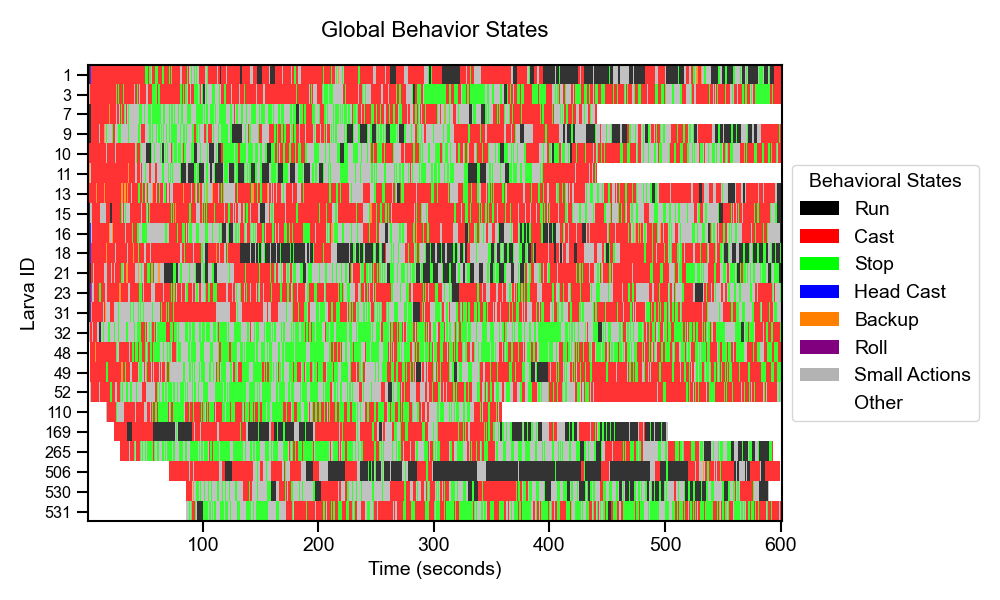

array([[[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ],
        ...,
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ]],

       [[0.7, 0.7, 0.7],
        [0.7, 0.7, 0.7],
        [0.7, 0.7, 0.7],
        ...,
        [1. , 0. , 0. ],
        [0.7, 0.7, 0.7],
        [1. , 0. , 0. ]],

       [[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ],
        ...,
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]],

       ...,

       [[1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        ...,
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]],

       [[1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        ...,
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ]],

       [[1. , 1. , 1. ],
        [1. , 1. , 1. ],
        [1. , 1. , 1. ],
        ...,
        [0. , 1. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ]]

In [30]:
trx_processor.plot_global_behavior_matrix(filtered_extracted_data)

In [9]:
# # Save video of the first larva's behavior
# first_larva = sorted(filtered_extracted_data.keys())[0]
# trx_processor.save_behavioral_contour_video(
#     filtered_extracted_data, 
#     first_larva,
#     output_path='../results/larva_behavior_withstates.mp4',
#     fps=20
# )

In [10]:
# For a single experiment
single_exp_results = trx_processor.analyze_run_orientations_single(filtered_extracted_data)

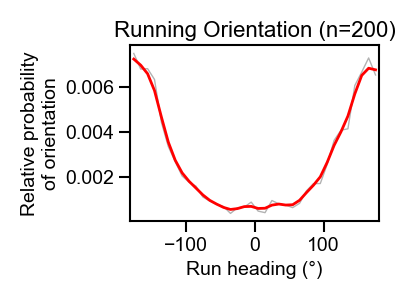

In [11]:
# For all experiments
all_exp_results = trx_processor.analyze_run_orientations_all(filtered_all_data)

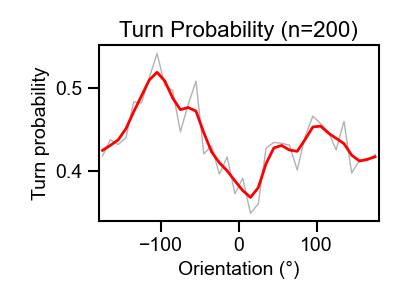

In [12]:
# Analyze all data
all_larvae_turns = trx_processor.analyze_turn_rate_by_orientation(
    filtered_all_data)

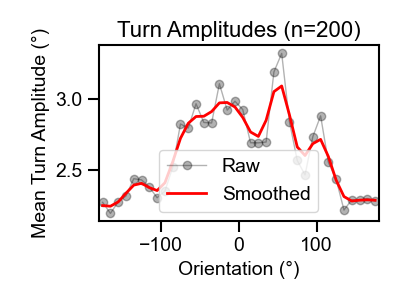

In [13]:
# Analyze all data
all_larvae_turns = trx_processor.analyze_turn_amplitudes_by_orientation(
    filtered_all_data
)

In [14]:
# # Or let the function pick a random larva with good data
# results = trx_processor.analyze_cast_head_dynamics(filtered_all_data)

# # Print the statistics
# print(f"Analysis for larva {results['larva_id']}:")
# print(f"Number of cast events: {results['n_events']}")
# print(f"Mean cast duration: {resuts['mean_duration']:.3f}s")
# print(f"Mean max downer-upper angle: {results['mean_max_angle_du']:.2f} degrees")
# print(f"Mean max bend angle: {results['mean_max_bend_angle']:.2f} degrees")
# print(f"Mean bend amplitude during casts: {results['mean_bend_amplitude']:.2f} degrees")

In [15]:
# Analyze turn rates in lateral quadrants
# lateral_stats = trx_processor.analyze_lateral_turn_rates(filtered_all_data, 
#                                          angle_width=15,
#                                          bin_width=5)

In [16]:
# Analyze cast directions relative to wind
# cast_stats = trx_processor.analyze_cast_directions(filtered_all_data)

In [17]:
# # Import libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from src import trx_processor

# # Apply the analysis function
# results = trx_processor.analyze_perpendicular_cast_directions(filtered_all_data, angle_width=45)

# # Print summary statistics
# print(f"Analysis completed for {results['larvae_processed']} larvae")
# print(f"Total casts analyzed: {sum(results['total_counts'].values())}")

# # Print probabilities
# print("\nCast Direction Probabilities:")
# print(f"  Upstream: {results['probabilities']['upstream']:.3f} ({results['total_counts']['upstream']} casts)")
# print(f"  Downstream: {results['probabilities']['downstream']:.3f} ({results['total_counts']['downstream']} casts)")

# # Print statistical results
# chi2, p_chi2 = results['chi2_result']
# significance = "*" * sum([p_chi2 < threshold for threshold in [0.05, 0.01, 0.001]])
# print(f"\nChi-square test results:")
# print(f"  chi2: {chi2:.4f}")
# print(f"  p-value: {p_chi2:.4f} {significance}")

# # Add t-test results if available
# if results['ttest_result'] is not None:
#     t_stat, p_val = results['ttest_result']
#     significance = "*" * sum([p_val < threshold for threshold in [0.05, 0.01, 0.001]])
#     print(f"\nPaired t-test results:")
#     print(f"  t-statistic: {t_stat:.4f}")
#     print(f"  p-value: {p_val:.4f} {significance}")

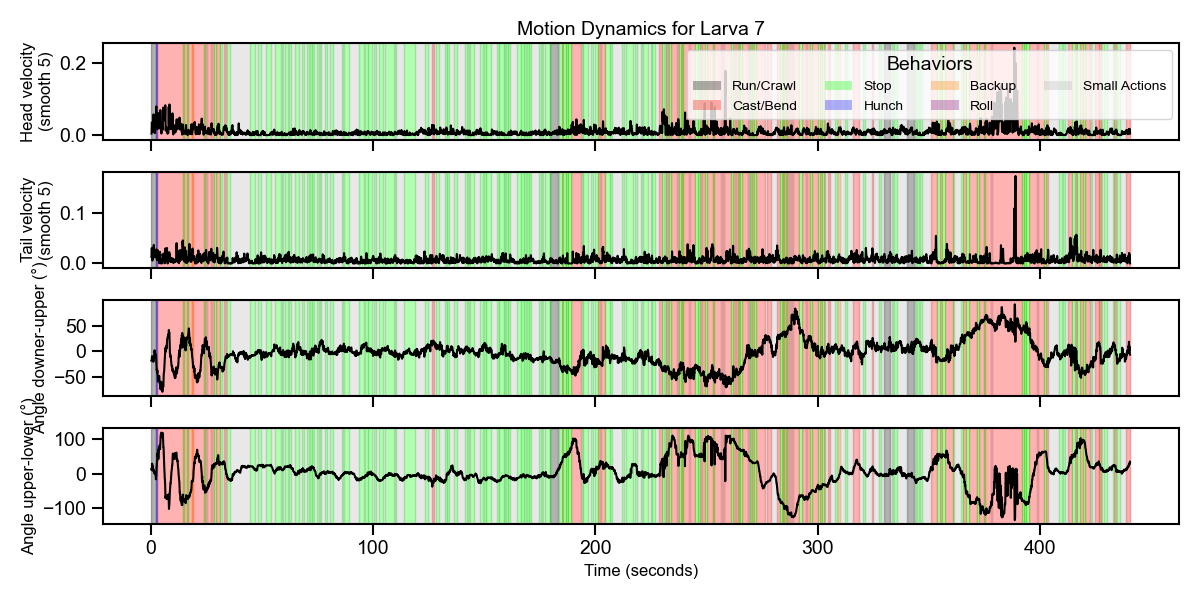

Plotted motion dynamics for larva 7 over 440.4 seconds


In [18]:
# trx_processor.plot_larva_angle_dynamics(filtered_all_data)
# Or with specific larva:
trx_processor.plot_larva_angle_dynamics(filtered_extracted_data, larva_id=7)

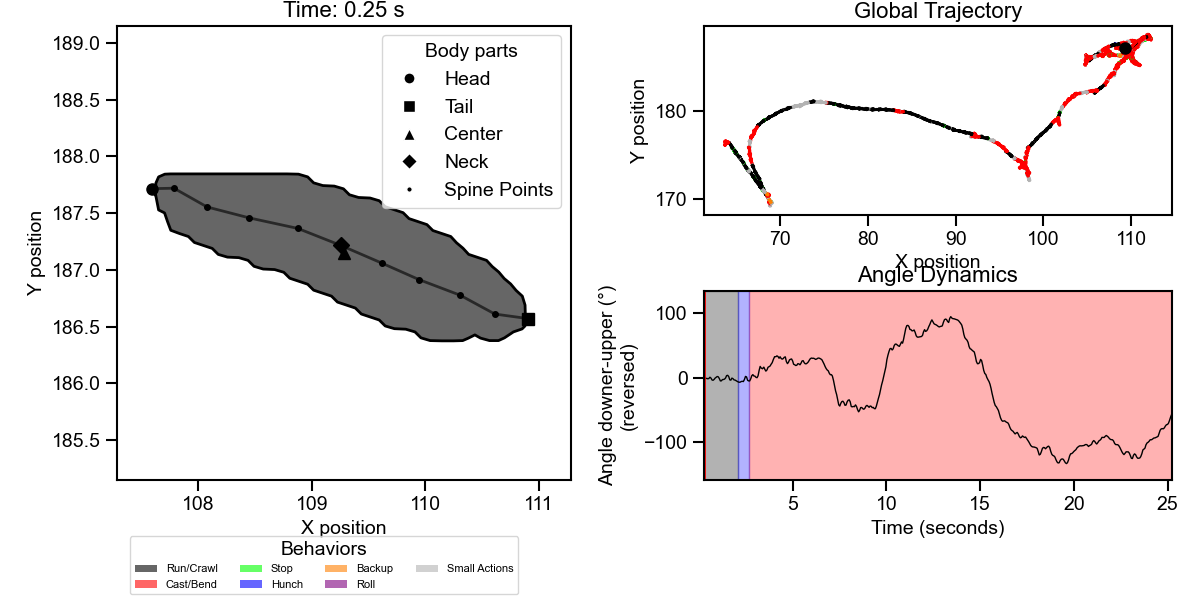

In [21]:
first_larva = sorted(filtered_extracted_data.keys())[0]
trx_processor.plot_behavioral_contour_with_global_trajectory(filtered_extracted_data, first_larva)